# Customer Churn Prediction
## Introduction
TODO  
## What has changed since the proposal?
At first, the plan included exploring various types of churning datasets beyond just mobile operators. However, due to the challenge of finding diverse datasets, this was narrowed down to focus specifically on the provided Iranian mobile operator dataset. We originally didn't know what kind of data to focus on, so we were interested in any churning data, like streaming services, banks, websites, etc. Then we decided to focus on one main dataset, so we chose banking. Since that data was hard to find because it was incomplete, we decided to use this Iranian mobile operator dataset.

## Data
For this project, we are using a dataset from an [Iranian mobile operator](https://www.kaggle.com/datasets/royjafari/customer-churn/data "Kaggle page for dataset").

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
%matplotlib inline
import matplotlib.pyplot as plt




## Exploratory Data Analysis
Data Breakdown

In [2]:
# Read in the data
customer_churn = pd.read_csv('customerChurn.csv')
customer_churn.head(10)

,Call Failure,Complains,Subscription Length,Charge Amount,Seconds of Use,Frequency of use,Frequency of SMS,Distinct Called Numbers,Age Group,Tariff Plan,Status,Age,Customer Value,FN,FP,Churn
0,8,0,38,0,4370,71,5,17,3,1,1,30,197.640,177.8760,69.7640,0
1,0,0,39,0,318,5,7,4,2,1,2,25,46.035,41.4315,60.0000,0
2,10,0,37,0,2453,60,359,24,3,1,1,30,1536.520,1382.8680,203.6520,0
3,10,0,38,0,4198,66,1,35,1,1,1,15,240.020,216.0180,74.0020,0
4,3,0,38,0,2393,58,2,33,1,1,1,15,145.805,131.2245,64.5805,0
5,11,0,38,1,3775,82,32,28,3,1,1,30,282.280,254.0520,78.2280,0
6,4,0,38,0,2360,39,285,18,3,1,1,30,1235.960,1112.3640,173.5960,0
7,13,0,37,2,9115,121,144,43,3,1,1,30,945.440,850.8960,144.5440,0
8,7,0,38,0,13773,169,0,44,3,1,1,30,557.680,501.9120,105.7680,0
9,7,0,38,1,4515,83,2,25,3,1,1,30,191.920,172.7280,69.1920,0


In [3]:
# Data description
customer_churn.describe()

,Call Failure,Complains,Subscription Length,Charge Amount,Seconds of Use,Frequency of use,Frequency of SMS,Distinct Called Numbers,Age Group,Tariff Plan,Status,Age,Customer Value,FN,FP,Churn
count,3150.000000,3150.000000,3150.000000,3150.000000,3150.000000,3150.000000,3150.000000,3150.000000,3150.000000,3150.000000,3150.000000,3150.000000,3150.000000,3150.000000,3150.000000,3150.000000
mean,7.627937,0.076508,32.541905,0.942857,4472.459683,69.460635,73.174921,23.509841,2.826032,1.077778,1.248254,30.998413,470.972916,423.875624,98.304688,0.157143
std,7.263886,0.265851,8.573482,1.521072,4197.908687,57.413308,112.237560,17.217337,0.892555,0.267864,0.432069,8.831095,517.015433,465.313890,50.724492,0.363993
min,0.000000,0.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,15.000000,0.000000,0.000000,60.000000,0.000000
25%,1.000000,0.000000,30.000000,0.000000,1391.250000,27.000000,6.000000,10.000000,2.000000,1.000000,1.000000,25.000000,113.801250,102.421125,61.380125,0.000000
50%,6.000000,0.000000,35.000000,0.000000,2990.000000,54.000000,21.000000,21.000000,3.000000,1.000000,1.000000,30.000000,228.480000,205.632000,72.848000,0.000000
75%,12.000000,0.000000,38.000000,1.000000,6478.250000,95.000000,87.000000,34.000000,3.000000,1.000000,1.000000,30.000000,788.388750,709.549875,128.838875,0.000000
max,36.000000,1.000000,47.000000,10.000000,17090.000000,255.000000,522.000000,97.000000,5.000000,2.000000,2.000000,55.000000,2165.280000,1948.752000,266.528000,1.000000


In [4]:
# Data's unique values
customer_churn.nunique()

Call  Failure                37
Complains                     2
Subscription  Length         45
Charge  Amount               11
Seconds of Use             1756
Frequency of use            242
Frequency of SMS            405
Distinct Called Numbers      92
Age Group                     5
Tariff Plan                   2
Status                        2
Age                           5
Customer Value             2654
FN                         2654
FP                         2195
Churn                         2
dtype: int64

In [5]:
customer_churn["Churn"].value_counts()

0    2655
1     495
Name: Churn, dtype: int64

### Visualization 1
Name: Marcos  
Hypothesis: Customers who use their service more are less likely to churn.

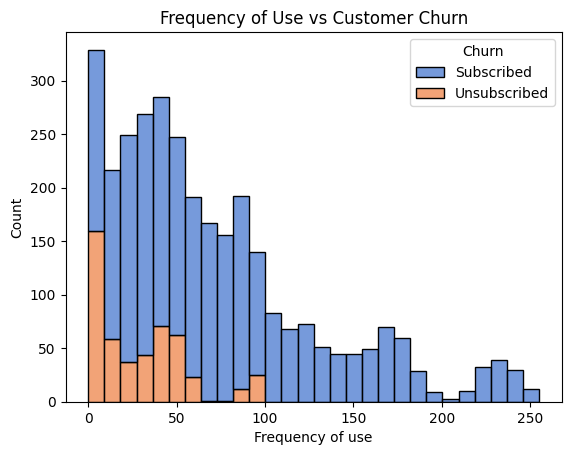

In [6]:
# First Plot, histplot with both freq and churn
useHP = sns.histplot(x="Frequency of use", hue="Churn", data=customer_churn, multiple="stack", palette="muted")
useHP.set(title="Frequency of Use vs Customer Churn")
useHP_legend = useHP.get_legend()
useHP_handles = useHP_legend.legend_handles
useHP_legend.remove()
useHP.legend(useHP_handles, ['Subscribed', 'Unsubscribed'], title='Churn')

[Text(0.5, 1.0, 'Frequency of use of unsubscribed customers')]

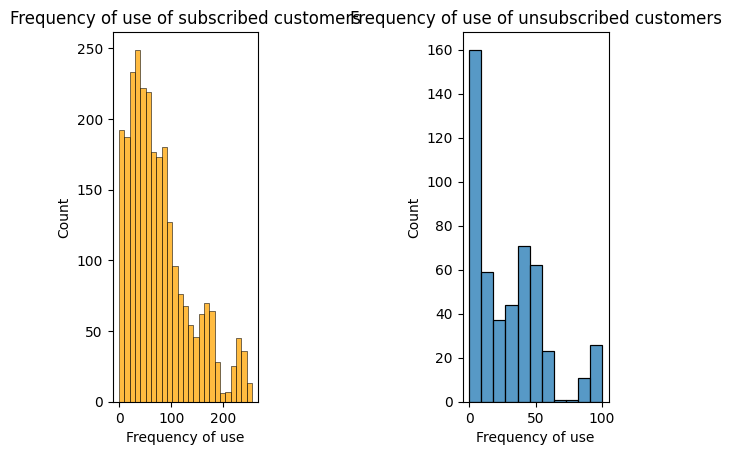

In [7]:
# Second plot, side by side
useHP_fig, useHP_ax =plt.subplots(1,3)
useHP_d1 = customer_churn.loc[customer_churn["Churn"] == 0]
useHP_d2 = customer_churn.loc[customer_churn["Churn"] == 1]
useHP_1 = sns.histplot(x="Frequency of use", data=useHP_d1, ax=useHP_ax[0], color="orange")
useHP_2 = sns.histplot(x="Frequency of use", data=useHP_d2, ax=useHP_ax[2])
useHP_ax[1].set_visible(False)
useHP_1.set(title="Frequency of use of subscribed customers")
useHP_2.set(title="Frequency of use of unsubscribed customers")

Customers who churn have lower frequency of use than those who do not churn.

### Visualization 2

**Name: Allan Patrick Alex**

**Hypothesis: Customer value does not affect the likelihood of a customer unsubscribing.**



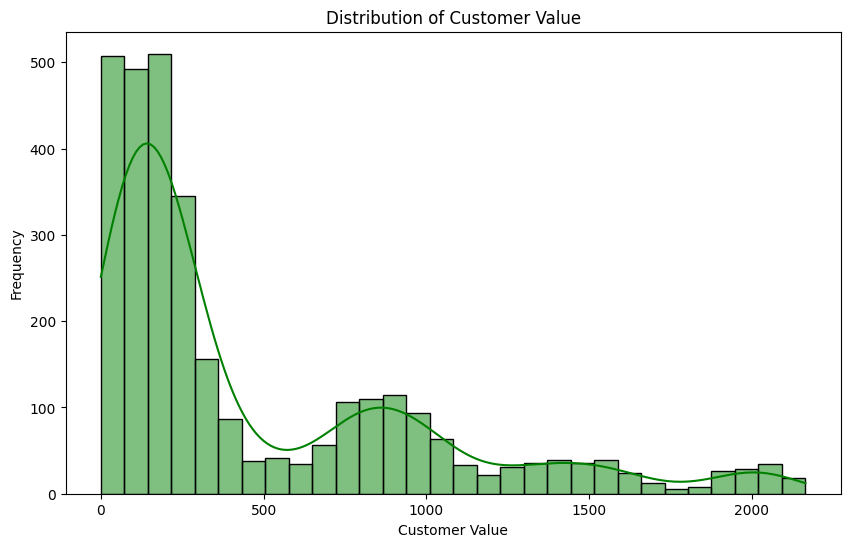

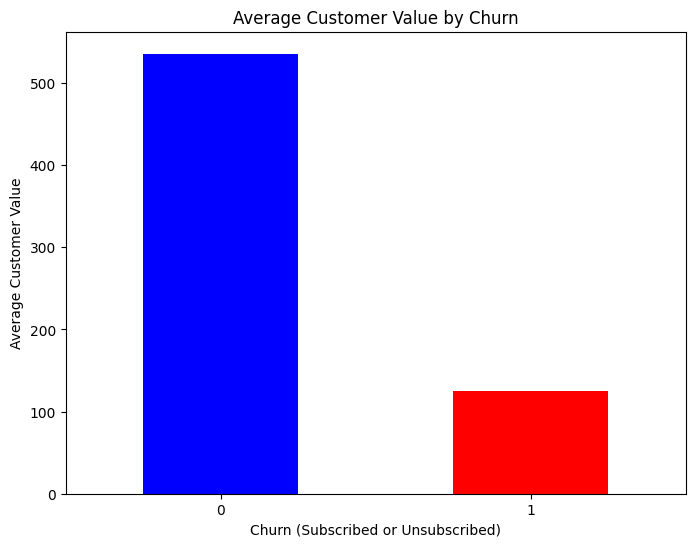

In [8]:
# Create a histogram to visualize the distribution of customer values
plt.figure(figsize=(10, 6))
sns.histplot(data=customer_churn, x="Customer Value", bins=30, kde=True, color='green')
plt.title("Distribution of Customer Value")
plt.xlabel("Customer Value")
plt.ylabel("Frequency")
plt.show()

# # Analyze the relationship between customer value and churn
# plt.figure(figsize=(10, 6))
# sns.boxplot(data=customer_churn, x="Churn", y="Customer Value", palette="muted")
# plt.title("Relationship between Customer Value and Churn")
# plt.xlabel("Churn (Subscribed or Unsubscribed)")
# plt.ylabel("Customer Value")
# plt.show()

# Calculate the mean customer value for each churn category
mean_customer_value = customer_churn.groupby('Churn')['Customer Value'].mean()

# Create a bar chart to visualize the average customer value by churn category
plt.figure(figsize=(8, 6))
mean_customer_value.plot(kind='bar', color=['blue', 'red'])
plt.title("Average Customer Value by Churn")
plt.xlabel("Churn (Subscribed or Unsubscribed)")
plt.ylabel("Average Customer Value")
plt.xticks(rotation=0)  # Rotate x-axis labels if needed
plt.show()

**The analysis of customer data reveals a skewed distribution of customer values, with the majority of customers having lower values and a smaller group of customers having significantly higher values. Additionally, there is an imbalance in the churn categories, with a large number of customers still subscribed and a relatively small number of customers who have unsubscribed. This suggests a potential pattern where customers with higher values tend to remain subscribed, while customers with lower values may be more likely to unsubscribe.**

### Visualization 3
Name: Wiktoria Zielinska

Hypothesis: More people in their 20's and above are more likely to churn, with elders (those over around 50) are less likely to churn.

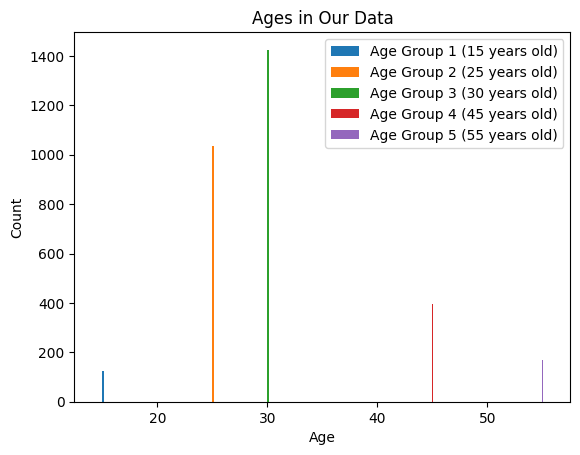

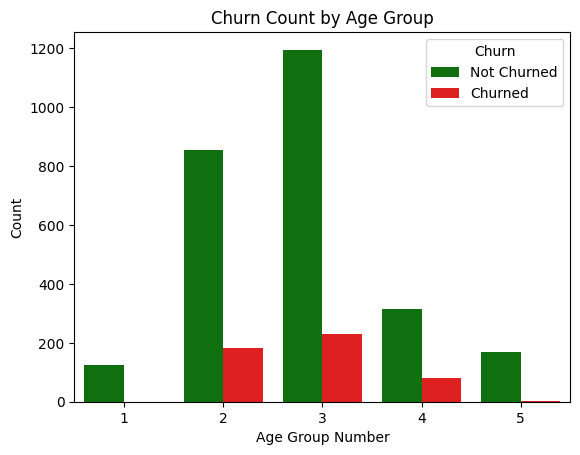

In [9]:
age_group_labels = {
    1: '15 years old',
    2: '25 years old',
    3: '30 years old',
    4: '45 years old',
    5: '55 years old'
}

for age_group, age_label in age_group_labels.items():
    ages_in_group = customer_churn[customer_churn['Age Group'] == age_group]['Age']
    plt.hist(ages_in_group, label=f'Age Group {age_group} ({age_label})')

plt.xlabel('Age')
plt.ylabel('Count')
plt.title('Ages in Our Data')
plt.legend()
plt.show()

sns.countplot(data=customer_churn, x='Age Group', hue='Churn', palette={0: 'green', 1: 'red'})
plt.title('Churn Count by Age Group')
plt.xlabel('Age Group Number')
plt.ylabel('Count')
plt.legend(title='Churn', loc='upper right', labels=['Not Churned', 'Churned'])
plt.show()


Explanation: The dataset is categorized into 5 age groups 1 - 5, with each group being either 15, 25, 30, 45, 55, in that order. We see that we have a large dataset, but we only have fixed age values, not a range. We see that we have a lot of people aged 25 or 30, and less of the other ages. We also see that our hypothesis was correct since age groups 1 and 5 (ages 15 and 55) have no churning habits, while age groups 2 and 3 (ages 25 and 30) show the most churning habits. Age group 4 also exhibits some churning habits, but this is also significant since that age grouo us much smaller than age group 2 and 3. I thought that this would be an interesting hypothesis to test out because companies can understand why certain age groups are churning their services and then they can better prepare for that to try to keep them as customers through incentives. Some incentives can be loyalty programs or personalized offers / services.


### Visualization 4
Name: Wiktoria Zielinska

Hypothesis: Customers who use the mobile service for a longer time are less likely to churn compared to those that use it for a shorter time.

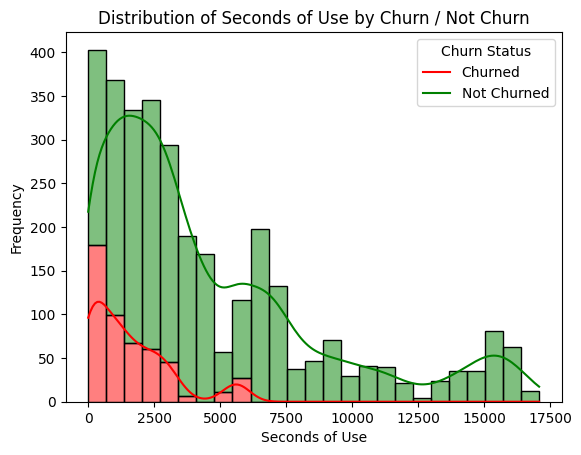

In [18]:
sns.histplot(data=customer_churn, x='Seconds of Use', hue='Churn', multiple='stack', kde=True, palette={0: 'green', 1: 'red'})
plt.title('Distribution of Seconds of Use by Churn / Not Churn')
plt.xlabel('Seconds of Use')
plt.ylabel('Frequency')
plt.legend(title='Churn Status', labels=['Churned', 'Not Churned'])
plt.show()

Explanation: We can see the total seconds of use for customers who have churned and have not churned. Green represents not churned customers, while red represents churned customers. We see that the lower the seconds of use, the more likely a person is to churn. We also see that the majoirty of people do not churn, especially if they have a lot of seconds of use. We can conclude that those that did churn likely used the service for a short or limited time since they did not get the most out of it with their low seconds of use. This is interesting because there has to be some kind of reason as to why users who churn have low seconds of use. It might be because they no longer want the service so they cancel it after a short amount of time.

### Visualization 5
Name:

## Machine Learning Analysis
### ML Analysis 1
Name:

### ML Analysis 2
Name:

## Reflection
### What is the most challenging part of the project that you've encountered so far?
Finding enough data for our project has been challening. As Levin mentioned in our proposal, companies don't really share churn data as they don't want their competitors to gain any insight. This is causing trouble for our group, as we want to view customer churn as a whole, and not for an individual industry.
### What are your initial insights?
TODO
### Are there any concrete results you can show at this point? If not, why not?
TODO
### Going forward, what are the current biggest problems you're facing?
Understanding our dataset presents a challenge due to its limitations. For example, looking into why certain age groups are more prone to churn services. Since our dataset lacks this specific information, we need to invest extra time in research. This involves exploring correlations between our visualizations and conducting in-depth analyses. Simplifying these complexities will help us gain meaningful insights into our data.
### Do you think you are on track with your project? If not, what parts do you need to dedicate more time to?
Yes, but we are going to have to spend more time researching resonings for our our visualizations since it isn't exactly known why some things turn out the way they do. We also might need to look into another dataset that is similar to this one just so that the results are not skewed with this particular dataset.
### Given your initial exploration of the data, is it worth proceeding with your project, why? If not, how will you move forward (method, data etc)?
Yes, it is worth proceeding because this data is still very useful and has a lot of different people that were included. Also, this is especially interesting since this is specifically Iranian data so seeing how people churn in other countries is interesting. The only thing that we might want to do is include and explore another dataset that is also about churning mobile operators, but one that just has more information in it, like education status, income status, etc. If we have that information, then we may be able to see why some people are more likely to churn than others.

## Next Step
TODO